## Calculate the Index Campani to build a optimized portfolio with the following securities:
1. Alaska black fia
1. gap absoluto fim
1. vista long biased advisory fic fim
1. ibiuna hedge fic multimercado
1. Polo norte 1 long short
1. real investor bdr nivel 1
1. mypk3
1. viia3
1. btlg11
1. vale3
1. petr4
1. bbas3
1. itsa4
1. cyr3
1. bbse3
1. fixed income
* The investments funds data I got from investing.com
* The tickets return I got from yfinance library
* The only fund that I didn't find in investing.com I downloaded from economatica

In [3]:
#Take the correct names for the funds using the API from investing.com
import investpy as inv
list_funds=['Alaska black','gap absoluto ',
            'Ibiuna Hedge ','Polo Norte ','Real Investor ']
for name in list_funds:
  x=inv.search_funds(by='name',value=name)
  for i in range(x.shape[0]):
    print(x.loc[i,'name'])

Alaska Black Fundo De Investimento Em Cotas De Fundos De Investimento Em Ações - Bdr Nível I
Alaska Black Master Fundo De Investimento Em Ações - Bdr Nível I
Alaska Black Fundo De Investimento Em Cotas De Fundos De Investimento Em Ações Ii - Bdr Nível I
Alaska Black Institucional Fundo De Investimento De Acoes
Alfa Alaska Black Institucional - Fundo De Investimento Em Cotas De Fundos De Investimento Em Ações
Itaú Private Gap Absoluto Fundo De Investimento Em Cotas De Fundos De Investimento Multimercado
Gap Absoluto A Fundo De Investimento Em Cotas De Fundos De Investimento Multimercado
Gap Absoluto Fundo De Investimento Em Cotas De Fundos De Investimento Multimercado
Gap Absoluto Master Fundo De Investimento Multimercado
Gap Absoluto P Fundo De Investimento Em Cotas De Fundos De Investimento Multimercado
Itaú Seleção Gap Absoluto Multimercado Fundo De Investimento Em Cotas De Fundos De Investimento
Ibiuna Hedge J Fundo De Investimento Em Cotas De Fundos De Investimento Multimercado
Ibi

In [4]:
#get the historical data of the funds
from datetime import date,timedelta
import pandas as pd
import numpy as np
actual_date=date.today()
#take the actual data and try to take the last five years.
begin_date=(actual_date-timedelta(days=1825))

#Take the correct name of funds 
funds=['Alaska Black Institucional Fundo De Investimento De Acoes','Gap Absoluto Fundo De Investimento Em Cotas De Fundos De Investimento Multimercado',
       'Ibiuna Hedge Fundo De Investimento Em Cotas De Fundos De Investimento Multimercado','Polo Norte I Fundo De Investimento Em Cotas De Fundos De Investimento Multimercado',
       'Real Investor Fundo De Investimento Em Ações']

#Initialize the dataframe
df_funds=inv.get_fund_historical_data(fund='Alaska Black Institucional Fundo De Investimento De Acoes',country='brazil',
    from_date=begin_date.strftime("%d/%m/%Y"),to_date=actual_date.strftime("%d/%m/%Y"))[['Close']]
df_funds.columns=['C_alk']

#Merge all funds in the original dataframe df_funds
for name in funds[1:]:
    df_1=inv.get_fund_historical_data(fund=name,country='brazil',
    from_date=begin_date.strftime("%d/%m/%Y"),to_date=actual_date.strftime("%d/%m/%Y"))[['Close']]
    df_1.columns=['C_'+name[0:3]]
    df_funds=df_funds.merge(df_1, how='left', left_index=True,right_index=True)

#read the excel file because we investing doesn't have the information
df_vistalong= pd.read_excel('Vista_LB_advisory.xlsx',skiprows=3,header=0)
df_vistalong=df_vistalong[['Data','Cota']]
#Clean the excel
df_vistalong=df_vistalong[df_vistalong['Cota']!='-']
#Transform the datatype of the column 'Cota'
df_vistalong=df_vistalong.astype({'Cota':'float64'})
df_vistalong.rename(columns={'Cota':'Cota_vlb'}, inplace=True)
df_vistalong.set_index('Data',inplace=True)    
    
#Merge the funds from excel and investing.com    
df_funds=df_funds.merge(df_vistalong, how='left', left_index=True,right_index=True)

#The vista biased is very new, sow there are many nan rows, I have to clean that
df_funds.dropna(inplace=True,axis=0)

In [5]:
#now for single securities I will use yfinance package
#The tickets are mypk3,viia3,btlg11,vale3,petr4,bbas3,itsa4,cyr3,bbse3
import yfinance as yf
tickets=['MYPK3.SA','VIIA3.SA','BTLG11.SA','VALE3.SA','PETR4.SA','BBAS3.SA',
         'ITSA4.SA','CYRE3.SA','BBSE3.SA']

#initial data based on funds
ini_date=df_funds.index[0].strftime("%Y/%m/%d").replace('/','-')

#initialize the dataframe
df_securities=yf.Ticker('MYPK3.SA').history(start=ini_date)[['Close']]
df_securities.columns=['C_MYPK3']

for ticket in tickets[1:]:
    df_t=yf.Ticker(ticket).history(start=ini_date)[['Close']]
    df_t.columns=['C_'+ ticket[0:-3]]
    df_securities=pd.concat([df_securities,df_t],axis=1)
    


In [6]:
#merge the funds and tickets by index
portfolio_df=df_funds.merge(df_securities,how='left',left_index=True,right_index=True)
portfolio_df.dropna(inplace=True,axis=0)
portfolio_df.head()

,C_alk,C_Gap,C_Ibi,C_Pol,C_Rea,Cota_vlb,C_MYPK3,C_VIIA3,C_BTLG11,C_VALE3,C_PETR4,C_BBAS3,C_ITSA4,C_CYRE3,C_BBSE3
Date,,,,,,,,,,,,,,,
2020-05-18,1.862,21.697,282.892,7.830,10.425,1.000000,10.504041,8.87,91.180611,40.277157,12.360400,23.784800,7.410460,11.734105,21.037638
2020-05-19,1.873,21.626,282.877,7.846,10.400,0.999917,10.307702,9.29,91.063103,41.094322,12.453736,23.142431,7.150140,11.612688,21.019735
2020-05-20,1.883,21.663,282.905,7.902,10.588,1.006714,10.843167,9.16,91.552696,41.251476,12.867083,23.724037,7.158817,12.141721,21.064495
2020-05-21,1.928,21.961,282.541,7.977,10.927,1.016314,11.387558,9.49,91.601654,40.175011,12.793747,25.399389,7.540620,13.477309,21.619534
2020-05-22,1.874,21.955,282.468,7.964,10.785,1.009658,11.789157,9.70,92.531868,39.499271,12.447068,24.748344,7.688137,12.904914,21.046593


In [7]:
#scale the columns 100*((p1-p0)/p0)
#Not calculate the percentual for selic because I already did that in the cell 5
for col in portfolio_df.columns:
    portfolio_df[col]=100*(portfolio_df[col].shift(-1)-portfolio_df[col])/portfolio_df[col]
portfolio_df.dropna(inplace=True,axis=0)
portfolio_df.head()

,C_alk,C_Gap,C_Ibi,C_Pol,C_Rea,Cota_vlb,C_MYPK3,C_VIIA3,C_BTLG11,C_VALE3,C_PETR4,C_BBAS3,C_ITSA4,C_CYRE3,C_BBSE3
Date,,,,,,,,,,,,,,,
2020-05-18,0.590763,-0.327234,-0.005302,0.204342,-0.239808,-0.008314,-1.869173,4.735063,-0.128874,2.028856,0.755122,-2.700751,-3.512881,-1.034736,-0.085097
2020-05-19,0.533903,0.171090,0.009898,0.713739,1.807692,0.679810,5.194807,-1.399355,0.537642,0.382423,3.319054,2.513158,0.121354,4.555644,0.212942
2020-05-20,2.389804,1.375617,-0.128665,0.949127,3.201738,0.953565,5.020587,3.602619,0.053475,-2.609520,-0.569948,7.061834,5.333326,10.999993,2.634948
2020-05-21,-2.800830,-0.027321,-0.025837,-0.162969,-1.299533,-0.654957,3.526647,2.212856,1.015499,-1.681989,-2.709751,-2.563230,1.956294,-4.247104,-2.650107
2020-05-22,4.589114,1.812799,0.052749,1.833250,5.646732,2.150424,5.980313,15.567013,1.947085,-0.338172,4.338516,10.487536,4.288921,12.432789,4.848993


In [8]:
# get the selic using bcb package
from bcb import sgs
selic=sgs.get({'selic':432},start=ini_date)
#Convert selic to a daily return
selic['selic_daily']=((1+selic['selic']*0.01)**(1/252)-1)*100
selic.drop(['selic'],axis=1,inplace=True)
selic.head()

,selic_daily
Date,
2020-05-18,0.01173
2020-05-19,0.01173
2020-05-20,0.01173
2020-05-21,0.01173
2020-05-22,0.01173


In [9]:
#get the ibov index daily
df_ibov=yf.Ticker('^BVSP').history(start=ini_date)[['Close']]
df_ibov.columns=['C_IBOV']
df_ibov['C_IBOV']=100*(df_ibov['C_IBOV'].shift(-1)-df_ibov['C_IBOV'])/df_ibov['C_IBOV']
df_ibov.dropna(inplace=True,axis=0)
df_ibov.head()

,C_IBOV
Date,
2020-05-18,-0.556691
2020-05-19,0.714622
2020-05-20,2.100370
2020-05-21,-1.028581
2020-05-22,4.247137


In [10]:
#merge all columns with selic daily
portfolio_df=(portfolio_df.merge(selic,how='left',left_index=True,right_index=True)
              .merge(df_ibov,how='left',left_index=True,right_index=True))


In [11]:
portfolio_df.head()

,C_alk,C_Gap,C_Ibi,C_Pol,C_Rea,Cota_vlb,C_MYPK3,C_VIIA3,C_BTLG11,C_VALE3,C_PETR4,C_BBAS3,C_ITSA4,C_CYRE3,C_BBSE3,selic_daily,C_IBOV
Date,,,,,,,,,,,,,,,,,
2020-05-18,0.590763,-0.327234,-0.005302,0.204342,-0.239808,-0.008314,-1.869173,4.735063,-0.128874,2.028856,0.755122,-2.700751,-3.512881,-1.034736,-0.085097,0.01173,-0.556691
2020-05-19,0.533903,0.171090,0.009898,0.713739,1.807692,0.679810,5.194807,-1.399355,0.537642,0.382423,3.319054,2.513158,0.121354,4.555644,0.212942,0.01173,0.714622
2020-05-20,2.389804,1.375617,-0.128665,0.949127,3.201738,0.953565,5.020587,3.602619,0.053475,-2.609520,-0.569948,7.061834,5.333326,10.999993,2.634948,0.01173,2.100370
2020-05-21,-2.800830,-0.027321,-0.025837,-0.162969,-1.299533,-0.654957,3.526647,2.212856,1.015499,-1.681989,-2.709751,-2.563230,1.956294,-4.247104,-2.650107,0.01173,-1.028581
2020-05-22,4.589114,1.812799,0.052749,1.833250,5.646732,2.150424,5.980313,15.567013,1.947085,-0.338172,4.338516,10.487536,4.288921,12.432789,4.848993,0.01173,4.247137


In [12]:
portfolio_df.tail()

,C_alk,C_Gap,C_Ibi,C_Pol,C_Rea,Cota_vlb,C_MYPK3,C_VIIA3,C_BTLG11,C_VALE3,C_PETR4,C_BBAS3,C_ITSA4,C_CYRE3,C_BBSE3,selic_daily,C_IBOV
Date,,,,,,,,,,,,,,,,,
2022-06-01,1.299614,-0.017176,0.074566,-0.331990,0.839588,1.667146,-0.809966,3.236251,0.146773,1.881237,-0.866090,0.081776,0.421496,0.660794,0.000000,0.047631,0.927622
2022-06-02,-0.901526,0.089332,0.283196,-0.630502,-0.832597,-1.135755,1.319094,-1.880876,-0.449435,-1.601782,1.747313,-1.388896,-1.469039,-0.218816,-3.143713,0.047631,-1.148648
2022-06-03,-0.909727,-0.175071,0.412777,-1.101401,-1.488360,-1.916635,-0.247980,-3.194893,0.000000,0.101745,0.066045,-1.242748,0.425985,-3.362573,-0.811434,0.047631,-0.824468
2022-06-06,0.000000,-0.481431,-0.148272,-0.217891,-0.393853,0.134273,-1.740211,-2.970294,0.107960,2.337662,1.188121,-0.699104,-1.060449,-2.269290,-0.973899,0.047631,-0.105277
2022-06-07,-1.306497,-0.200415,0.217770,-0.097052,-1.121411,-0.448751,2.087281,2.380950,-0.019609,-3.442952,-0.489236,-0.901163,-1.393356,-2.554179,-0.393393,0.047631,-1.546289


In [13]:
#check if there is any null values
portfolio_df.isnull().sum()

C_alk          0
C_Gap          0
C_Ibi          0
C_Pol          0
C_Rea          0
Cota_vlb       0
C_MYPK3        0
C_VIIA3        0
C_BTLG11       0
C_VALE3        0
C_PETR4        0
C_BBAS3        0
C_ITSA4        0
C_CYRE3        0
C_BBSE3        0
selic_daily    0
C_IBOV         0
dtype: int64

In [14]:
#check the types of all columns
portfolio_df.dtypes

C_alk          float64
C_Gap          float64
C_Ibi          float64
C_Pol          float64
C_Rea          float64
Cota_vlb       float64
C_MYPK3        float64
C_VIIA3        float64
C_BTLG11       float64
C_VALE3        float64
C_PETR4        float64
C_BBAS3        float64
C_ITSA4        float64
C_CYRE3        float64
C_BBSE3        float64
selic_daily    float64
C_IBOV         float64
dtype: object

In [15]:
#Calculate the Campani index for each stock
#The arguments of this function is the portfolio with the returns of securities and the selic series
#Both should have the same number of rows 

def CI_securities(returns_securities,selic):
    
    # calculate the left standard deviation for each column 
    df_left=returns_securities.copy()
    for col in df_left.columns:
        df_left[col]=np.where(df_left[col]-selic<0,df_left[col]-selic,0)
        
    left_std=abs(df_left.sum()/df_left.shape[0])
    
    # calculate the right standard deviation for each column
    df_right=returns_securities.copy()
    for col in df_right.columns:
        df_right[col]=np.where(df_right[col]-selic>0,df_right[col]-selic,0)
    
    right_std=df_right.sum()/df_right.shape[0]
    
    #calculate campani index
    Campani_index=right_std/left_std
    
    #print the left std, right std, expected return and Campani_index for each security
    return (pd.concat([left_std,right_std,returns_securities.mean(),Campani_index],axis=1)
            .rename(columns={0:'left_std',1:'right_std',2:'E_return',3:'Campani_index'})
            .sort_values(by='Campani_index',ascending=False))
    
    
    

In [16]:
CI_securities(portfolio_df.iloc[:,:-2],portfolio_df.iloc[:,-2])

,left_std,right_std,E_return,Campani_index
C_Ibi,0.072689,0.097585,0.045073,1.342505
C_Gap,0.154501,0.193409,0.059086,1.251834
C_PETR4,0.833099,1.029721,0.216799,1.236013
C_VALE3,0.783215,0.945029,0.181991,1.206602
C_Rea,0.496806,0.563103,0.086474,1.133445
C_alk,0.552478,0.625788,0.093488,1.132694
C_BBAS3,0.737518,0.817553,0.100212,1.108519
C_MYPK3,1.050760,1.154863,0.124280,1.099074
C_ITSA4,0.673998,0.713854,0.060033,1.059133
C_BBSE3,0.614675,0.645104,0.050606,1.049504


In [17]:
#create the portfolios
import numpy as np
import pandas as pd
# wi is the minimum value, we the maximum value, n is the n° numbers in the interval
def create_portfolio(wi,we,n,data_frame):
    n_cols=len(data_frame.columns)
    x=np.linspace(wi,we, n) # create initial values
    port_random=pd.DataFrame(np.array(np.meshgrid(x,x,x,x,x,x,x,x,x,x,x,x,x,x,x)).T.reshape(-1,n_cols)[1:,:],
                    columns=data_frame.columns) #[1:,:] is to remove the portfolio with all zeros
    port_random=port_random.apply(lambda x:round(x/port_random.sum(axis=1),1)) #normalize the portfolio
    port_random.drop_duplicates(inplace=True) #remove duplicates
    port_random=port_random.loc[port_random.sum(axis=1)==1] #remove rows that don't have sum==1
    port_random.reset_index(drop=True,inplace=True)#reset_index
    return port_random

In [18]:
#calculate the Campani index for random portfolios
#pass the selic and the returns of the portfolio in the function
def port_CI(returns_securities,selic):
    port_c=create_portfolio(0,1,2,returns_securities)
    
    
    #Loop in all portfolio_random rows
    for i in range(port_c.shape[0]):
        returns=returns_securities.copy()
        #Multiply each row in the dataframe for each random_portfolio
        returns['E_return']=returns.multiply(port_c.iloc[i],axis=1).sum(axis=1)
        #Calculate the left, right and Campani index for the entire dataframe
        returns['left_std']=np.where(returns['E_return']-selic<0,returns['E_return']-selic,0)
        returns['right_std']=np.where(returns['E_return']-selic>0,returns['E_return']-selic,0)
        right_std=returns['right_std'].sum()
        left_std=abs(returns['left_std'].sum())
        if left_std==0:
            left_std=0.00001                       # If there aren't negative values in the period
        Campani_index=right_std/left_std
        #Create two columns in the portfolio_random dataframe with the return and CI for each row 
        port_c.loc[i,'Campani_index']=Campani_index
        port_c.reset_index(drop=True,inplace=True)
        
    return port_c.sort_values(by='Campani_index',ascending=False).drop(['Campani_index'],axis=1).iloc[0]
        

In [76]:
%%time
# Set the index for the loop to separate train and test
list_index=portfolio_df.index         #create a list with index to interate
ini_data_train=14                      #The slice in pandas using loc considers the begin and the end indexes     
end_data_train=ini_data_train+179          
ini_data_test=end_data_train+1             
end_data_test=ini_data_test+29
end_date_index=[]
#Initialize the empty dataframe to get the necessary data
Dataframe_returns=pd.DataFrame(columns=list(portfolio_df.columns[:-2])+['E_return']+['selic_return']+['Ibov_return'])

#Loop the index in the dataframe
while ini_data_train <= (len(list_index)-1-29-1-179):
    end_date_index.append(str(list_index[end_data_test])[:10])
    #train data
    train_data=portfolio_df.loc[list_index[ini_data_train]:list_index[end_data_train],:'C_BBSE3']
    selic_train=portfolio_df.loc[list_index[ini_data_train]:list_index[end_data_train],'selic_daily']
    
    #test_data
    test_data=portfolio_df.loc[list_index[ini_data_test]:list_index[end_data_test],:'C_BBSE3']
    selic_test=portfolio_df.loc[list_index[ini_data_test]:list_index[end_data_test],'selic_daily']
    IBOV_test=portfolio_df.loc[list_index[ini_data_test]:list_index[end_data_test],'C_IBOV']
    
    #Calculate best portfolio for the train test
    best_portfolio_train=port_CI(train_data,selic_train)
    
    #calculate the dataframe with the values of the expected return , IBOV and selic using test period
    best_portfolio_train['E_return']=test_data.multiply(best_portfolio_train,axis=1).sum(axis=1).mean()
    best_portfolio_train['selic_return']=selic_test.mean()
    best_portfolio_train['Ibov_return']=IBOV_test.mean()
    
    #Append the new dataframe with the test returns in the empty dataframe
    Dataframe_returns=pd.concat([Dataframe_returns,best_portfolio_train.to_frame().T],axis=0,ignore_index=True)
    
    #Increase the counter
    ini_data_train+=30
    end_data_train=ini_data_train+179          
    ini_data_test=end_data_train+1             
    end_data_test=ini_data_test+29
    
#set index of the dataframe
Dataframe_returns.set_index(np.array(end_date_index),inplace=True)

Wall time: 2min 27s


In [77]:
Dataframe_returns.tail()

,C_alk,C_Gap,C_Ibi,C_Pol,C_Rea,Cota_vlb,C_MYPK3,C_VIIA3,C_BTLG11,C_VALE3,C_PETR4,C_BBAS3,C_ITSA4,C_CYRE3,C_BBSE3,E_return,selic_return,Ibov_return
2021-12-10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011380,0.029805,-0.013805
2022-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.479862,0.035113,0.133630
2022-03-10,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.018989,0.039443,0.009341
2022-04-25,0.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.157695,0.043619,-0.099096
2022-06-07,0.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.091362,0.046806,0.016774


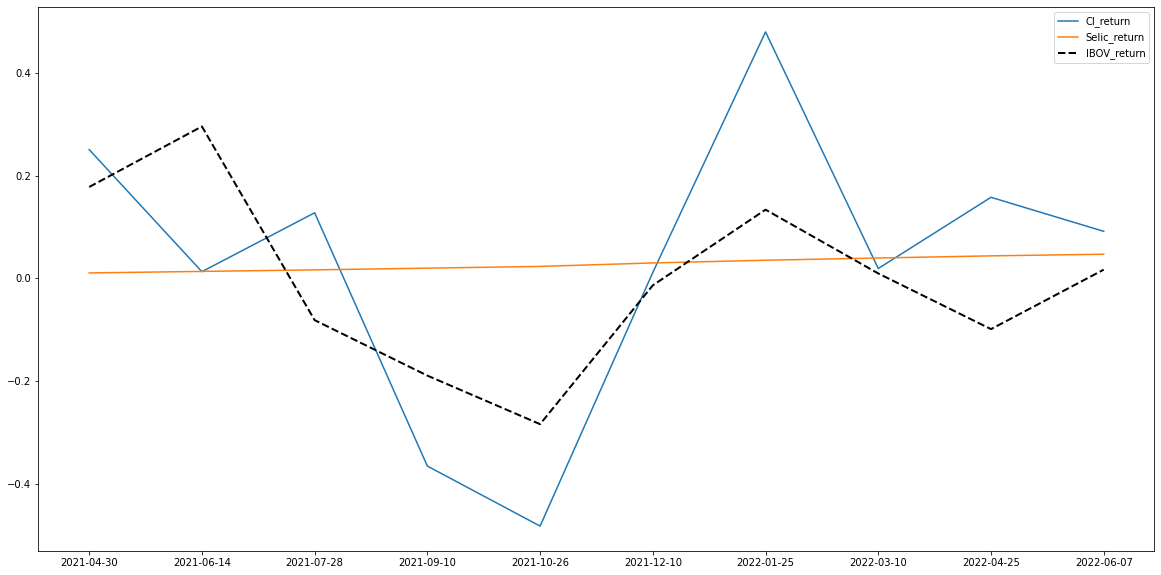

In [78]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(Dataframe_returns['E_return'],label='CI_return')
plt.plot(Dataframe_returns['selic_return'],label='Selic_return')
plt.plot(Dataframe_returns['Ibov_return'],color='black',linewidth=2,linestyle='dashed',label='IBOV_return')
plt.legend()
plt.show()